피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('pima-indians-diabetes.csv',skiprows=9,header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)
df.columns = ['P','G','BP','S','I','BMI','D','Age','Class']
df.head()

,P,G,BP,S,I,BMI,D,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#결측치 확인
df.isna().sum().sum()

0

In [ ]:
!pip install missingno

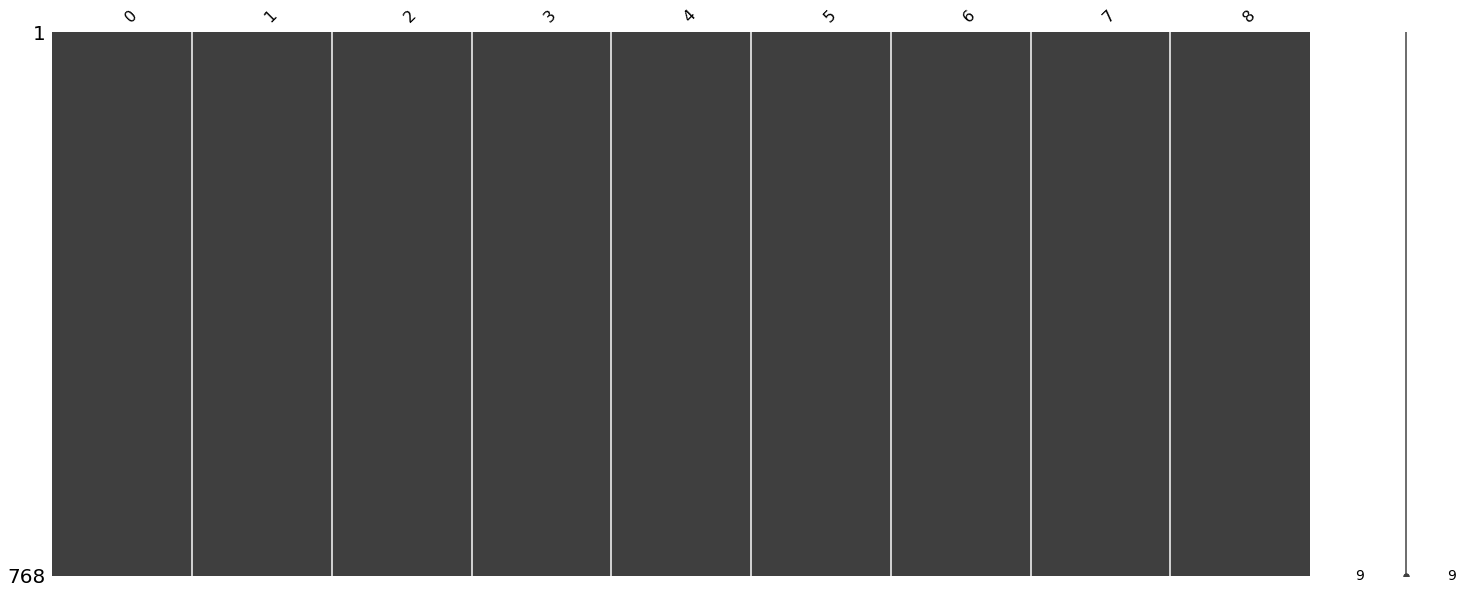

In [9]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [11]:
# X,Y를 ndarray로 추출
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
X.shape, y.shape

((768, 8), (768,))

* Train / Test dataset으로 분리

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2022,stratify=y)

In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [18]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([400, 214]))

In [19]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([100,  54]))

* Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2022)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [21]:
params = {
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[2,3,4]
}

* GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(dtc,params,scoring='accuracy',cv=5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [23]:
grid_dt.best_params_

{'max_depth': 5, 'min_samples_split': 3}

In [24]:
best_dt = grid_dt.best_estimator_
best_dt.score(X_test,y_test)

0.6558441558441559

In [25]:
X_test[0], y_test[0]

(array([  0.   , 135.   ,  94.   ,  46.   , 145.   ,  40.6  ,   0.284,
         26.   ]), 0)

In [26]:
best_dt.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [27]:
X_test.shape, X_test[0].shape

((154, 8), (8,))

In [28]:
best_dt.predict(X_test[0].reshape(1,-1))

array([0])

In [29]:
pred = best_dt.predict(X_test[0].reshape(1,-1))
print('양성' if pred[0]==1 else '음성')

음성
